In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [303]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [220]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [221]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Removing missing values

In [304]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### First, let's remove variables with most of the values missing

In [347]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [348]:
df = pd.concat([X , test_data])
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], axis=1)

In [307]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [349]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [281]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [282]:
df.MSZoning[df["Neighborhood"] == "IDOTRR"]

21           RM
30      C (all)
52           RM
61           RM
88      C (all)
         ...   
1429         RM
1430         RM
1431    C (all)
1432    C (all)
1433    C (all)
Name: MSZoning, Length: 93, dtype: object

In [283]:
df.groupby('MSSubClass')['LotFrontage'].apply(lambda x: x.isnull().sum()).to_dict()

{20: 185,
 30: 13,
 40: 1,
 45: 0,
 50: 25,
 60: 133,
 70: 11,
 75: 2,
 80: 33,
 85: 16,
 90: 17,
 120: 32,
 150: 1,
 160: 12,
 180: 1,
 190: 4}

In [350]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [351]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [233]:
# df['Electrical'] = df["Electrical"].fillna(df.Electrical.mode())

In [311]:
categorical_columns = df.select_dtypes(exclude=['int64','float64']).columns

In [312]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [352]:
df[categorical_columns] = df[categorical_columns].transform(lambda x: x.fillna(x.mode()[0]))   
df = df.fillna(0)

In [314]:
# numeric_missed = ['BsmtFinSF1',
#                   'BsmtFinSF2',
#                   'BsmtUnfSF',
#                   'TotalBsmtSF',
#                   'BsmtFullBath',
#                   'BsmtHalfBath',
#                   'GarageYrBlt',
#                   'GarageArea',
#                   'GarageCars',
#                   'MasVnrArea']
# for feature in numeric_missed:
#     df[feature] = df[feature].fillna(0)

In [353]:
# df = df.transform(lambda x: x.fillna(x.mean()[0]))   

## Fix skewness

<AxesSubplot:>

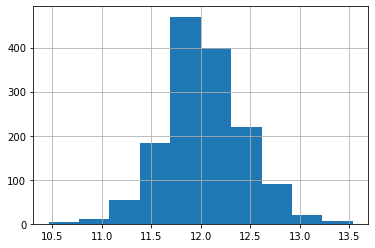

In [354]:
y = np.log1p(y)
y.hist()

In [131]:
from scipy.stats import norm, skew

In [355]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew.head(50)

GarageCars       53.935542
BsmtHalfBath     38.161761
BsmtFullBath     38.153322
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.185496
EnclosedPorch     4.003891
ScreenPorch       3.946694
MasVnrArea        3.322873
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.423105
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.161292
BsmtUnfSF         0.918362
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
OverallCond       0.570312
YearBuilt        -0.599806
GarageYrBlt      -3.650309
dtype: float64

In [356]:
# for feature in high_skew.index:
#     df[feature] = np.log1p(df[feature])

## Adding categorical columns

In [357]:
df = pd.get_dummies(df)


In [ ]:
# corr = train_data.corr()

In [15]:
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'corr' is not defined

In [358]:
train = df[:len(train_data)]
test = df[len(train_data):]

In [360]:
print(train.shape, test.shape, train_data.shape)

(1460, 271) (1459, 271) (1460, 81)


In [361]:
X = train

In [362]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## Training

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [364]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,893,3.044522,4.262680,9.037771,6,2.197225,7.582738,2003,0.000000,6.498282,...,0,0,0,1,0,0,0,0,1,0
1105,1106,4.110874,4.595120,9.413852,8,1.791759,7.598399,1995,5.894403,6.940222,...,0,0,0,1,0,0,0,0,1,0
413,414,3.433987,4.043051,9.100637,5,1.945910,7.564238,1950,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
522,523,3.931826,3.931826,8.517393,6,2.079442,7.574558,1950,0.000000,5.991465,...,0,0,0,1,0,0,0,0,1,0
1036,1037,3.044522,4.499810,9.464905,9,1.791759,7.604894,2008,4.262680,6.930495,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1011,3.931826,4.753590,9.965852,5,1.791759,7.575072,1950,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
390,391,3.931826,3.931826,9.036701,5,2.197225,7.550135,1950,0.000000,5.488938,...,0,0,0,1,0,0,0,0,1,0
1409,1410,4.110874,3.850148,9.930373,7,1.945910,7.594381,1991,4.820282,0.000000,...,0,0,0,1,0,0,0,0,1,0
847,848,3.044522,3.610918,9.650142,5,1.945910,7.587311,1972,0.000000,6.133398,...,0,0,0,1,0,0,0,0,1,0


In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [365]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [379]:
from catboost import CatBoostRegressor

In [380]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038876
0:	learn: 0.3833087	total: 67.8ms	remaining: 1m 7s
1:	learn: 0.3740773	total: 75.8ms	remaining: 37.8s
2:	learn: 0.3648148	total: 81.7ms	remaining: 27.1s
3:	learn: 0.3555808	total: 88.5ms	remaining: 22s
4:	learn: 0.3473514	total: 93.1ms	remaining: 18.5s
5:	learn: 0.3392944	total: 98.1ms	remaining: 16.2s
6:	learn: 0.3319713	total: 104ms	remaining: 14.7s
7:	learn: 0.3243956	total: 108ms	remaining: 13.4s
8:	learn: 0.3171589	total: 112ms	remaining: 12.3s
9:	learn: 0.3102759	total: 117ms	remaining: 11.5s
10:	learn: 0.3031293	total: 120ms	remaining: 10.8s
11:	learn: 0.2962939	total: 124ms	remaining: 10.2s
12:	learn: 0.2902140	total: 128ms	remaining: 9.72s
13:	learn: 0.2847446	total: 132ms	remaining: 9.28s
14:	learn: 0.2792070	total: 136ms	remaining: 8.91s
15:	learn: 0.2737477	total: 140ms	remaining: 8.63s
16:	learn: 0.2681639	total: 144ms	remaining: 8.35s
17:	learn: 0.2632508	total: 148ms	remaining: 8.08s
18:	learn: 0.2584695	total: 152ms	remaining: 7.84s
19:	lea

187:	learn: 0.0928699	total: 957ms	remaining: 4.13s
188:	learn: 0.0926366	total: 963ms	remaining: 4.13s
189:	learn: 0.0924712	total: 969ms	remaining: 4.13s
190:	learn: 0.0922837	total: 974ms	remaining: 4.12s
191:	learn: 0.0920411	total: 978ms	remaining: 4.12s
192:	learn: 0.0918465	total: 983ms	remaining: 4.11s
193:	learn: 0.0916861	total: 988ms	remaining: 4.11s
194:	learn: 0.0915466	total: 993ms	remaining: 4.1s
195:	learn: 0.0913841	total: 997ms	remaining: 4.09s
196:	learn: 0.0912383	total: 1s	remaining: 4.09s
197:	learn: 0.0910211	total: 1.01s	remaining: 4.09s
198:	learn: 0.0908686	total: 1.01s	remaining: 4.09s
199:	learn: 0.0906943	total: 1.02s	remaining: 4.08s
200:	learn: 0.0905317	total: 1.03s	remaining: 4.09s
201:	learn: 0.0903091	total: 1.03s	remaining: 4.09s
202:	learn: 0.0901219	total: 1.04s	remaining: 4.11s
203:	learn: 0.0900098	total: 1.05s	remaining: 4.11s
204:	learn: 0.0897116	total: 1.06s	remaining: 4.12s
205:	learn: 0.0896303	total: 1.07s	remaining: 4.11s
206:	learn: 0.08

366:	learn: 0.0686451	total: 1.91s	remaining: 3.29s
367:	learn: 0.0686326	total: 1.91s	remaining: 3.29s
368:	learn: 0.0685190	total: 1.92s	remaining: 3.28s
369:	learn: 0.0684667	total: 1.93s	remaining: 3.28s
370:	learn: 0.0684303	total: 1.93s	remaining: 3.27s
371:	learn: 0.0683450	total: 1.94s	remaining: 3.27s
372:	learn: 0.0682186	total: 1.94s	remaining: 3.26s
373:	learn: 0.0681493	total: 1.95s	remaining: 3.25s
374:	learn: 0.0680436	total: 1.95s	remaining: 3.25s
375:	learn: 0.0679555	total: 1.95s	remaining: 3.24s
376:	learn: 0.0679176	total: 1.96s	remaining: 3.23s
377:	learn: 0.0678505	total: 1.96s	remaining: 3.23s
378:	learn: 0.0677796	total: 1.97s	remaining: 3.22s
379:	learn: 0.0676477	total: 1.97s	remaining: 3.22s
380:	learn: 0.0676335	total: 1.98s	remaining: 3.21s
381:	learn: 0.0674669	total: 1.98s	remaining: 3.2s
382:	learn: 0.0673878	total: 1.98s	remaining: 3.2s
383:	learn: 0.0672947	total: 1.99s	remaining: 3.19s
384:	learn: 0.0671578	total: 1.99s	remaining: 3.19s
385:	learn: 0.

535:	learn: 0.0547903	total: 2.67s	remaining: 2.31s
536:	learn: 0.0547391	total: 2.68s	remaining: 2.31s
537:	learn: 0.0546552	total: 2.68s	remaining: 2.3s
538:	learn: 0.0545857	total: 2.69s	remaining: 2.3s
539:	learn: 0.0545394	total: 2.69s	remaining: 2.29s
540:	learn: 0.0544790	total: 2.7s	remaining: 2.29s
541:	learn: 0.0544528	total: 2.73s	remaining: 2.31s
542:	learn: 0.0543885	total: 2.74s	remaining: 2.31s
543:	learn: 0.0543234	total: 2.74s	remaining: 2.3s
544:	learn: 0.0542608	total: 2.75s	remaining: 2.3s
545:	learn: 0.0542144	total: 2.76s	remaining: 2.29s
546:	learn: 0.0541969	total: 2.76s	remaining: 2.29s
547:	learn: 0.0541249	total: 2.77s	remaining: 2.28s
548:	learn: 0.0540557	total: 2.77s	remaining: 2.27s
549:	learn: 0.0539994	total: 2.77s	remaining: 2.27s
550:	learn: 0.0538958	total: 2.78s	remaining: 2.27s
551:	learn: 0.0537901	total: 2.78s	remaining: 2.26s
552:	learn: 0.0536902	total: 2.79s	remaining: 2.25s
553:	learn: 0.0536476	total: 2.79s	remaining: 2.25s
554:	learn: 0.053

714:	learn: 0.0441271	total: 3.44s	remaining: 1.37s
715:	learn: 0.0440766	total: 3.44s	remaining: 1.37s
716:	learn: 0.0440349	total: 3.45s	remaining: 1.36s
717:	learn: 0.0440075	total: 3.46s	remaining: 1.36s
718:	learn: 0.0440016	total: 3.46s	remaining: 1.35s
719:	learn: 0.0439529	total: 3.47s	remaining: 1.35s
720:	learn: 0.0439165	total: 3.47s	remaining: 1.34s
721:	learn: 0.0438012	total: 3.47s	remaining: 1.34s
722:	learn: 0.0437369	total: 3.48s	remaining: 1.33s
723:	learn: 0.0436755	total: 3.48s	remaining: 1.33s
724:	learn: 0.0436307	total: 3.49s	remaining: 1.32s
725:	learn: 0.0435646	total: 3.49s	remaining: 1.32s
726:	learn: 0.0435001	total: 3.49s	remaining: 1.31s
727:	learn: 0.0434552	total: 3.5s	remaining: 1.31s
728:	learn: 0.0433899	total: 3.5s	remaining: 1.3s
729:	learn: 0.0433102	total: 3.5s	remaining: 1.3s
730:	learn: 0.0432492	total: 3.51s	remaining: 1.29s
731:	learn: 0.0431546	total: 3.51s	remaining: 1.29s
732:	learn: 0.0431152	total: 3.52s	remaining: 1.28s
733:	learn: 0.043

899:	learn: 0.0360176	total: 4.2s	remaining: 467ms
900:	learn: 0.0359236	total: 4.2s	remaining: 462ms
901:	learn: 0.0358829	total: 4.21s	remaining: 457ms
902:	learn: 0.0358666	total: 4.21s	remaining: 453ms
903:	learn: 0.0358255	total: 4.22s	remaining: 448ms
904:	learn: 0.0357939	total: 4.23s	remaining: 444ms
905:	learn: 0.0357479	total: 4.23s	remaining: 439ms
906:	learn: 0.0357378	total: 4.24s	remaining: 434ms
907:	learn: 0.0357328	total: 4.24s	remaining: 430ms
908:	learn: 0.0357253	total: 4.25s	remaining: 425ms
909:	learn: 0.0356894	total: 4.25s	remaining: 421ms
910:	learn: 0.0356457	total: 4.26s	remaining: 416ms
911:	learn: 0.0355785	total: 4.26s	remaining: 411ms
912:	learn: 0.0355193	total: 4.27s	remaining: 407ms
913:	learn: 0.0354972	total: 4.27s	remaining: 402ms
914:	learn: 0.0354898	total: 4.28s	remaining: 397ms
915:	learn: 0.0354428	total: 4.28s	remaining: 393ms
916:	learn: 0.0353771	total: 4.29s	remaining: 388ms
917:	learn: 0.0353493	total: 4.29s	remaining: 383ms
918:	learn: 0.

In [381]:
prediction_cb = catboost.predict(X_test)

### Choosing the best parametres 

In [26]:
reg_rf = RandomForestRegressor()

In [27]:
parametrs = {'n_estimators': [10,15, 22, 24, 26], 'max_depth' : [7, 10, 13, 15], 
             'min_samples_leaf': range(1, 5)}

In [28]:
grid_search_cv_reg = GridSearchCV(reg_rf, parametrs, cv=5)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763.0,0.0,...,0,0,0,1,1,0,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1304,20,73.0,8688,7,5,2005,2005,228.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836.0,0.0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1131,50,65.0,7804,4,3,1928,1950,0.0,622.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1295,20,60.0,8172,5,7,1955,1990,0.0,167.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [106]:
y_train

Id
616     11.831386
614     11.898195
1304    12.354497
487     11.957618
562     12.043560
          ...    
1096    12.080696
1131    11.813037
1295    11.652696
861     12.154521
1127    12.066816
Name: SalePrice, Length: 978, dtype: float64

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13, 15],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [10, 15, 22, 24, 26]})

In [91]:
grid_search_cv_clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 26}

In [32]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.006224066390041493

In [34]:
predict = best_clf.predict(X_test)

In [35]:
predict.shape

(482,)

### Calculate error

In [36]:
from sklearn.metrics import mean_squared_log_error


In [333]:
np.expm1(prediction)

array([138405.80095912, 320173.9444338 , 115959.00262958, 148894.65394112,
       305486.86111991,  81651.20807597, 208696.31232981, 150876.00027458,
        80498.32939055, 123118.0476211 , 166896.05274718, 119409.75541572,
       104401.34985422, 209039.21517679, 177844.1261156 , 127428.57122672,
       191278.95786384, 135244.55091827, 114615.44449724, 210555.29612191,
       171752.21032987, 223659.94105583, 174325.78273919, 122941.89263885,
       197356.57477477, 165632.4217141 , 179718.88822531, 101702.07205091,
       178146.95688357, 198092.85586961, 126429.28341588, 250410.67679378,
       167153.02998468, 111827.09154982, 254551.01551594, 148265.80067311,
       135748.87311322, 207268.62381629, 309394.84432446, 107994.79945016,
       124101.99693578, 231244.7027839 , 119072.84081621, 343085.25451686,
       139888.77780195, 129719.34654831, 118276.71260193, 128420.02888938,
       385330.76251161, 137774.87244676, 119937.28389156, 188847.9040185 ,
       115374.28283377, 3

In [334]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [382]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

NameError: name 'prediction_rf' is not defined

In [383]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.12419205936009335

In [368]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [384]:
y_pred = catboost.predict(test)

In [385]:
y_pred

array([11.76456203, 11.97694973, 12.12845925, ..., 11.92970944,
       11.67829543, 12.36103113])

In [386]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [387]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [388]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [389]:
tmp['SalePrice'] = np.expm1(y_pred)

In [390]:
y_pred.shape

(1459,)

In [391]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [392]:
pred_df

,SalePrice
Id,
1461,128611.852223
1462,159045.156658
1463,185063.417396
1464,194868.341636
1465,196905.046311
...,...
2915,79835.340821
2916,82104.184363
2917,151706.475398


In [393]:
pred_df.to_csv('out.csv')

In [126]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64